In [ ]:
# Objective 

# 1. Exploratory Data Analysis  [ EDA ]
# 2. Data Preprocessing 
# 3. Data Cleaning 

# Python Libraries :

# 1. numpy : numerical functions
# 2. pandas : data manipulation 
# 3. Visualization : matplotlib, seaborn

In [1]:
# Objective of Project :

# I performed EDA Exploratory Data Analysis on Comcast Telecom complaints dataset.
# In this project I extracted and performed manipulations on the data using pandas library. 
# I applied various algebric computrations using numpy.
# I used matplotlib, seaborn for analysis and visualization. The data pipeline used in this 
# project is data extraction , Data Cleaning , Data Pre processing ,
# Exploratory Data Analysis and Visualization.

In [2]:
# Import Libraries 

import numpy as np                    # Numeric computations 
import pandas as pd                   # Data Manipulation          
import matplotlib.pyplot as plt       # Data Visualization 
import seaborn as sns                 # Data Visualization 

In [3]:
df = pd.read_csv('Comcast_telecom_complaints_data.csv')

In [5]:
# Display Total rows and Columns 
df.shape

(2224, 11)

In [7]:
# Display Data 
df

In [9]:
# Display first 5 rows.

df.head()

In [11]:
# Display last 10 Rows.

df.tail(10)

In [12]:
# Display random 5 rows.

df.sample(5)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
1361,244072,Dishonest Billing Practices,20-04-15,20-Apr-15,4:28:08 AM,Customer Care Call,Muskegon,Michigan,49441,Closed,No
547,368187,"Prolonged internet outage, tardy response",26-06-15,26-Jun-15,1:30:10 PM,Internet,Decatur,Georgia,30033,Solved,No
1478,350931,day 3 of Internet going down and disconnect su...,19-06-15,19-Jun-15,1:37:10 AM,Internet,Olympia,Washington,98502,Solved,No
1028,218889,Wireless Internet,04-06-15,04-Jun-15,9:58:45 AM,Customer Care Call,Kent,Washington,98032,Closed,No
2005,255037,Billing - Comcast,24-04-15,24-Apr-15,12:22:26 PM,Internet,Sunnyvale,California,94087,Closed,No


In [13]:
# Identify data types of each column     dtypes

df.dtypes


Ticket #                       object
Customer Complaint             object
Date                           object
Date_month_year                object
Time                           object
Received Via                   object
City                           object
State                          object
Zip code                        int64
Status                         object
Filing on Behalf of Someone    object
dtype: object

In [14]:
# Since dates are in 'object' data types format. Letus change it to 'date'.

df['Date_month_year'] = pd.to_datetime(df['Date_month_year'])

In [15]:
df.dtypes

Ticket #                               object
Customer Complaint                     object
Date                                   object
Date_month_year                datetime64[ns]
Time                                   object
Received Via                           object
City                                   object
State                                  object
Zip code                                int64
Status                                 object
Filing on Behalf of Someone            object
dtype: object

In [16]:
# Identify Categorical and Continuous Features(Columns).

In [17]:
# Categorical Columns : 

In [18]:
df.columns

Index(['Ticket #', 'Customer Complaint', 'Date', 'Date_month_year', 'Time',
       'Received Via', 'City', 'State', 'Zip code', 'Status',
       'Filing on Behalf of Someone'],
      dtype='object')

In [ ]:
# Categorical Features : 'Received Via', 'State',Status', 'Filing on Behalf of Someone'

In [19]:
# 1. 'Received Via'

set(df['Received Via'])         # 2 Unique Values 

{'Customer Care Call', 'Internet'}

In [20]:
df['Received Via'].unique()

array(['Customer Care Call', 'Internet'], dtype=object)

In [22]:
# 2. 'City'

len(set(df['City']))

928

In [24]:
# 3. 'State'

len(set(df['State']))

43

In [26]:
# 4. 'Zip code'

len(set(df['Zip code']))

1543

In [27]:
# 5.Status

set(df['Status'])

{'Closed', 'Open', 'Pending', 'Solved'}

In [28]:
# 6. 'Filing on Behalf of Someone'

set(df['Filing on Behalf of Someone'])

{'No', 'Yes'}

In [29]:
# Data Preprocessing : 

In [30]:
# 5.Status

set(df['Status'])

{'Closed', 'Open', 'Pending', 'Solved'}

In [34]:
# count

df['Status'].value_counts()

Solved     973
Closed     734
Open       363
Pending    154
Name: Status, dtype: int64

In [35]:
# Replace 'Closed' => 'Solved' also 'Pending' => 'Open' in column 'Status' 

In [37]:
# List Comprehension : 
# list_name = [ expression         condition             for i in  list]

In [38]:
df['New_Status'] = ['Solved'         if i == 'Closed' or i == 'Solved'  else 'Open'   
                    for i in  df['Status']]

In [41]:
df['New_Status'].value_counts()

Solved    1707
Open       517
Name: New_Status, dtype: int64

In [42]:
# Exploratory Data Analysis EDA :  

In [67]:
# 1. UniVariate Analysis :

In [43]:
# 1.  Display Complaint Status in values and percentages.

df['New_Status'].value_counts()

Solved    1707
Open       517
Name: New_Status, dtype: int64

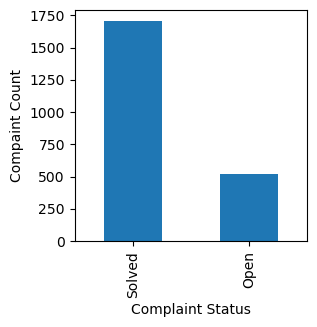

In [48]:
plt.figure(figsize= (3,3))
df['New_Status'].value_counts().plot.bar()
plt.xlabel('Complaint Status')
plt.ylabel('Compaint Count')
plt.show()


In [53]:
# Complaint Status in %

round(df['New_Status'].value_counts() / df.shape[0] * 100 , 2)

Solved    76.75
Open      23.25
Name: New_Status, dtype: float64

<Axes: ylabel='New_Status'>

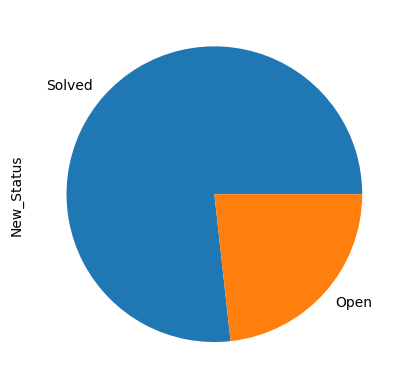

In [56]:
round(df['New_Status'].value_counts() / df.shape[0] * 100 , 2).plot.pie()

In [57]:
# Categorical Features : 'Received Via', 'State',Status', 'Filing on Behalf of Someone'

# bar() barh() pie() 

In [58]:
# 2. Find and Display compalaints' received via' in numbers and percentages.
# 3. Find and Display compalaints throught each 'state' in numbers and percentages. top 10.
# 4. Find and Display compalaints ''Filing on Behalf of Someone'' in numbers and %.

In [65]:
# 2. State

round(df['State'].value_counts()[ : 10] / df.shape[0] * 100, 2)

Georgia         12.95
Florida         10.79
California       9.89
Illinois         7.37
Tennessee        6.43
Pennsylvania     5.85
Michigan         5.17
Washington       4.41
Colorado         3.60
Maryland         3.51
Name: State, dtype: float64

<Axes: >

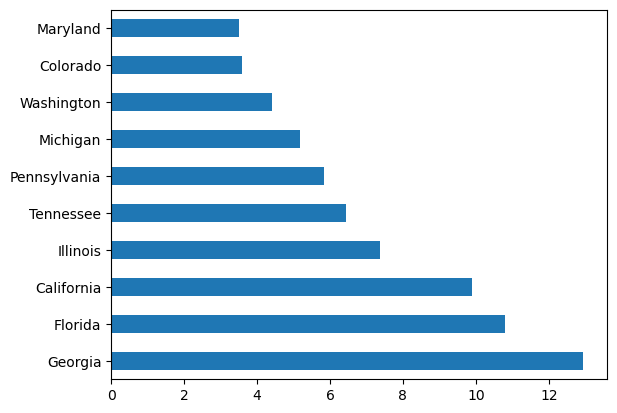

In [66]:

round(df['State'].value_counts()[ : 10] / df.shape[0] * 100, 2).plot.barh()

In [70]:
# 3. 'Filing on Behalf of Someone'

df['Filing on Behalf of Someone'].value_counts() 

No     2021
Yes     203
Name: Filing on Behalf of Someone, dtype: int64

In [68]:
# 'Filing on Behalf of Someone'

round(df['Filing on Behalf of Someone'].value_counts() / df.shape[0] * 100, 2)

No     90.87
Yes     9.13
Name: Filing on Behalf of Someone, dtype: float64

In [71]:
# Bi Variate Analysis : 

In [72]:
 #groupby()

In [73]:
# Categorical Features : 'Received Via', 'State',Status', 'Filing on Behalf of Someone'

In [77]:
# 5. Display state wise Compaint status.

df.groupby('State')['New_Status'].value_counts().unstack()

<Figure size 1000x500 with 0 Axes>

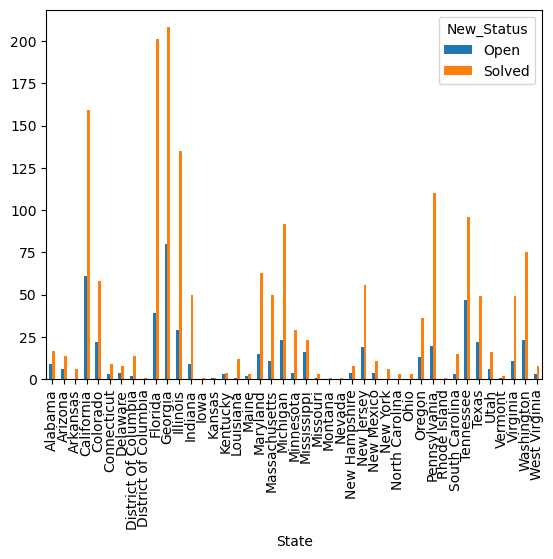

In [82]:
plt.figure(figsize = (10,5))
df.groupby('State')['New_Status'].value_counts().unstack().plot.bar()
plt.show()